In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score


In [20]:
# Load the dataset
try:
    df = pd.read_csv("sms-spam-collection-dataset/spam.csv")
    df = df[['v1', 'v2']]
    df.columns = ['label', 'message']
except Exception as e:
    print(f"Error loading dataset: {e}")


In [21]:
# Convert labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check for missing values
if df.isnull().sum().sum() > 0:
    df.dropna(inplace=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


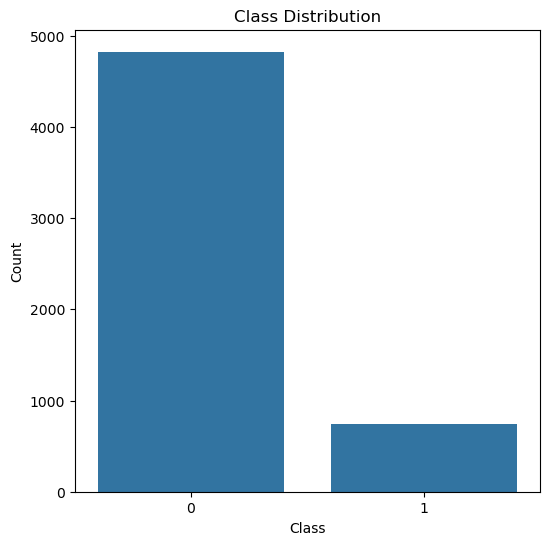

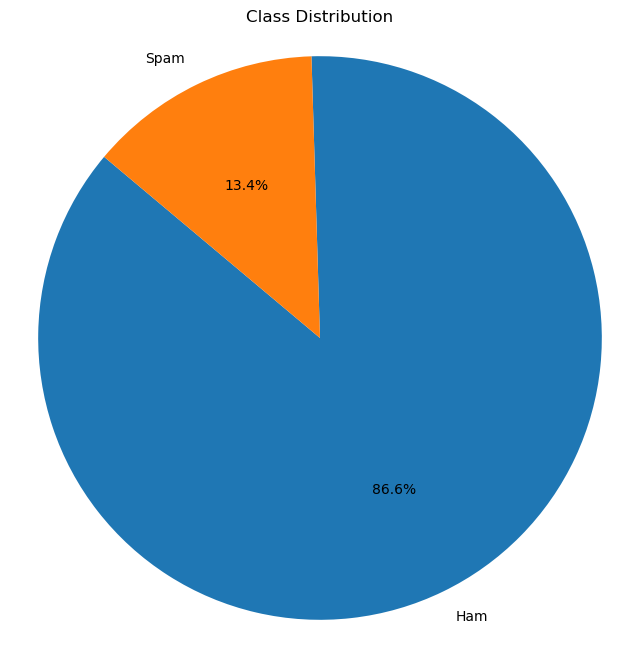

In [22]:
# Count plot for class distribution
plt.figure(figsize=(6,6))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Pie chart for class distribution
plt.figure(figsize=(8,8))
labels = ['Ham', 'Spam']
sizes = df['label'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()


In [23]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Naive Bayes Accuracy: 0.9739910313901345
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



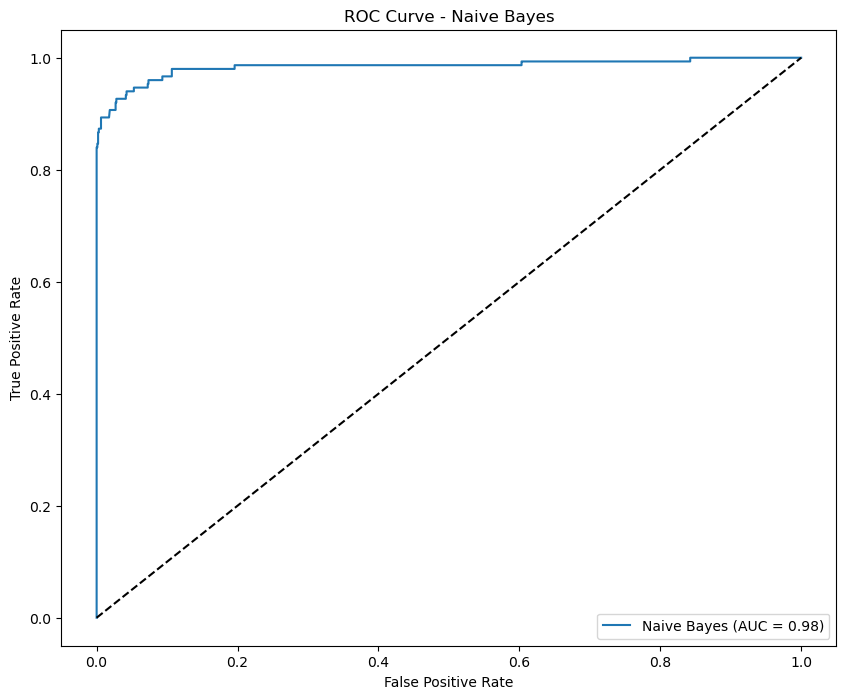

In [24]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
nb_predictions = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

# ROC Curve
nb_probs = nb_model.predict_proba(X_test_tfidf)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

# Plot ROC Curve for Naive Bayes
plt.figure(figsize=(10, 8))
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()


Logistic Regression Accuracy: 0.968609865470852
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



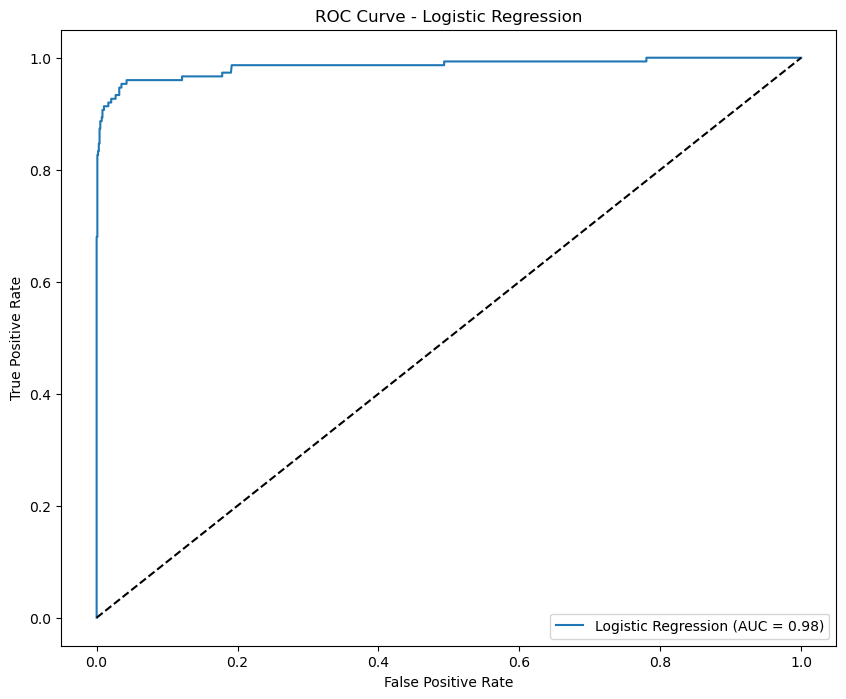

In [25]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
lr_predictions = lr_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

# ROC Curve
lr_probs = lr_model.predict_proba(X_test_tfidf)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Plot ROC Curve for Logistic Regression
plt.figure(figsize=(10, 8))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


SVM Accuracy: 0.9811659192825112
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



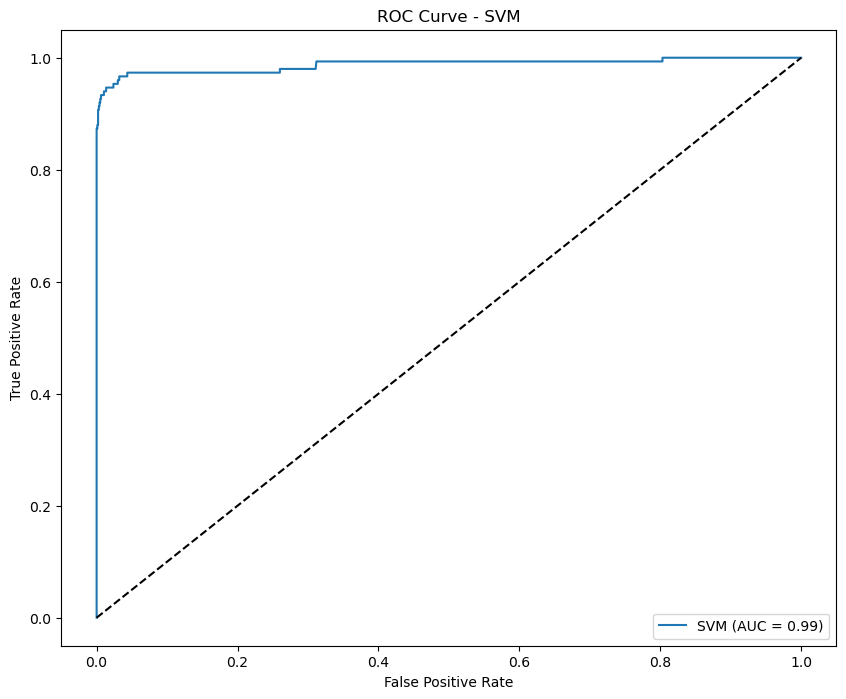

In [26]:
# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
svm_predictions = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# ROC Curve
svm_probs = svm_model.predict_proba(X_test_tfidf)[:, 1]
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# Plot ROC Curve for SVM
plt.figure(figsize=(10, 8))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()


In [27]:
# Print comparison of results
print("Comparison of Model Performance:")
nb_accuracy = accuracy_score(y_test, nb_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

# Determine the most accurate classifier
accuracies = {
    "Naive Bayes": nb_accuracy,
    "Logistic Regression": lr_accuracy,
    "SVM": svm_accuracy
}

most_accurate_classifier = max(accuracies, key=accuracies.get)
print(f"The most accurate classifier is: {most_accurate_classifier} with an accuracy of {accuracies[most_accurate_classifier]}")


Comparison of Model Performance:
Naive Bayes Accuracy: 0.9739910313901345
Logistic Regression Accuracy: 0.968609865470852
SVM Accuracy: 0.9811659192825112
The most accurate classifier is: SVM with an accuracy of 0.9811659192825112
